# CM50270 Reinforcement Learning
## Graded Assessment 2: Racetrack

In this assignment, you will implement and compare the performance of three reinforcement learning algorithms: On-Policy First-Visit Monte-Carlo Control, Sarsa, and Q-Learning.

**Total number of marks:** 40 marks.

**What to submit:** Your completed Jupyter notebook (.ipynb file) which should include **all** of your source code. Please **do not change the file name or compress/zip your submission**. Please do not include any identifying information on the files you submit. This coursework will be marked **anonymously**.

**Where to submit:** CM50270 Moodle Page.

You are required to **work individually**. You are welcome to discuss ideas with others but you must design your own implementation and **write your own code**.

**Do not plagiarise**. Plagiarism is a serious academic offence. For details on what plagiarism is and how to avoid it, please visit the following webpage: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

If you are asked to use specific variable names, data-types, function signatures and notebook cells, please **ensure that you follow these instructions**. Not doing so will cause the our marking software to reject your work, and will assign you a score of zero for that question. Please **do not duplicate or delete existing cells**: if you need additional cells, please insert new ones. **If our marking software rejects your work because you have not followed our instructions, you may not get any credit for your work**.

Please **do not use any non-standard, third-party libraries** apart from numpy and matplotlib. In this assignment, you should also use the `racetrack_env.py` file, which we have provided for you. **If we are unable to run your code because you have used unsupported external libraries, you may not get any credit for your work.**

Please remember to **save your work regularly**.

Please be sure to **restart the kernel and run your code from start-to-finish** (Kernel → Restart & Run All) before submitting your notebook. Otherwise, you may not be aware that you are using variables in memory that you have deleted.

Your total runtime must be less than **10 minutes** on the University's lab computers, and **written answer length limits** must be adhered to. Otherwise, you may not get credit for your work.

## The Racetrack Environment
We have implemented a custom environment called "Racetrack" for you to use during this piece of coursework. It is inspired by the environment described in the course textbook (Reinforcement Learning, Sutton & Barto, 2018, Exercise 5.12), but is not exactly the same.

### Environment Description
Consider driving a race car around a turn on a racetrack. In order to complete the race as quickly as possible, you would want to drive as fast as you can but, to avoid running off the track, you must slow down while turning.

In our simplified racetrack environment, the agent is at one of a discrete set of grid positions. The agent also has a discrete speed in two directions, $x$ and $y$. So the state is represented as follows:
$$(\text{position}_y, \text{position}_x, \text{velocity}_y, \text{velocity}_x)$$

The agent collects a reward of -1 at each time step, an additional -10 for leaving the track (i.e., ending up on a black grid square in the figure below), and an additional +10 for reaching the finish line (any of the red grid squares). The agent starts each episode on a randomly selected grid-square on the starting line (green grid squares) with a speed of zero in both directions. At each time step, the agent can change its speed in both directions. Each speed can be changed by +1, -1 or 0, giving a total of nine actions. For example, the agent may increase its speed in the $x$ direction by -1 and its speed in the $y$ direction by +1. The agent's speed cannot be greater than +10 or less than -10 in either direction.

<img src="images/track_big.png" style="width: 600px;"/>


The agent's next state is determined by its current grid square, its current speed in two directions, and the changes it  makes to its speed in the two directions. This environment is stochastic. When the agent tries to change its speed, no change occurs (in either direction) with probability 0.2. In other words, 20% of the time, the agent's action is ignored and the car's speed remains the same in both directions.

If the agent leaves the track, it is returned to a random start grid-square and has its speed set to zero in both directions; the episode continues. An episode ends only when the agent transitions to a goal grid-square.



### Environment Implementation
We have implemented the above environment in the `racetrack_env.py` file, for you to use in this coursework. Please use this implementation instead of writing your own, and please do not modify the environment.

We provide a `RacetrackEnv` class for your agents to interact with. The class has the following methods:
- **`reset()`** - this method initialises the environment, chooses a random starting state, and returns it. This method should be called before the start of every episode.
- **`step(action)`** - this method takes an integer action (more on this later), and executes one time-step in the environment. It returns a tuple containing the next state, the reward collected, and whether the next state is a terminal state.
- **`render(sleep_time)`** - this method renders a matplotlib graph representing the environment. It takes an optional float parameter giving the number of seconds to display each time-step. This method is useful for testing and debugging, but should not be used during training since it is *very* slow. **Do not use this method in your final submission**.
- **`get_actions()`** - a simple method that returns the available actions in the current state. Always returns a list containing integers in the range [0-8] (more on this later).

In our code, states are represented as Python tuples - specifically a tuple of four integers. For example, if the agent is in a grid square with coordinates ($Y = 2$, $X = 3$), and is moving zero cells vertically and one cell horizontally per time-step, the state is represented as `(2, 3, 0, 1)`. Tuples of this kind will be returned by the `reset()` and `step(action)` methods. It is worth noting that tuples can be used to index certain Python data-structures, such as dictionaries.

There are nine actions available to the agent in each state, as described above. However, to simplify your code, we have represented each of the nine actions as an integer in the range [0-8]. The table below shows the index of each action, along with the corresponding changes it will cause to the agent's speed in each direction.

<img src="images/action_grid.png" style="width: 250px;"/>

For example, taking action 8 will increase the agent's speed in the $x$ direction, but decrease its speed in the $y$ direction.

### Racetrack Code Example
Below, we go through a quick example of using the `RaceTrackEnv` class.

First, we import the class, then create a `RaceTrackEnv` object called `env`. We then initialise the environment using the `reset()` method, and take a look at the initial state variable and the result of `plot()`.


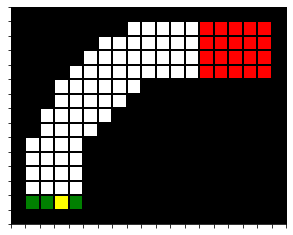

Initial State: (1, 3, 0, 0)


In [1]:
%matplotlib inline

# Set random seed to make example reproducable.
import numpy as np
import random
seed = 5
random.seed(seed)
np.random.seed(seed)

from racetrack_env import RacetrackEnv

# Instantiate environment object.
env = RacetrackEnv()

# Initialise/reset environment.
state = env.reset()
env.render()
print("Initial State: {}".format(state))

As you can see, `reset()` has returned a valid initial state as a four-tuple. The function `plot()` uses the same colour-scheme as described above, but also includes a yellow grid-square to indicate the current position of the agent.

Let's make the agent go upward by using `step(1)`, then inspect the result (recall that action `1` increments the agent's vertical speed while leaving the agent's horizontal speed unchanged).

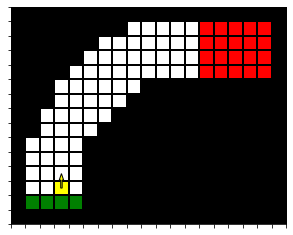

Next State: (2, 3, 1, 0), Reward: -1, Terminal: False


In [2]:
# Let us increase the agent's vertical speed (action 1).
next_state, reward, terminal = env.step(1)
env.render()
print("Next State: {}, Reward: {}, Terminal: {}".format(next_state, reward, terminal))

You can see that the agent has moved one square upwards, and now has a positive vertical speed (indicated by the yellow arrow). Let's set up a loop to see what happens if we take the action a few more times, causing it to repeatedly leave the track.

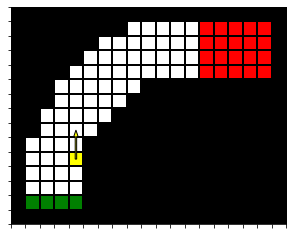

In [3]:
num_steps = 50
for t in range(num_steps) :
    next_state, reward, terminal = env.step(1)
    env.render()

## Exercise 1: On-Policy MC Control (6 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using On-Policy First-Visit MC Control, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 5.4 p.101).

<img src="images/mc_control_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 20.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of a tabular **On-Policy First-Visit MC Control** agent should produce a list named `mc_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `mc_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

In [4]:
from datetime import datetime        
                    
class Agent:
    # Base class for an 𝜖-greedy agent which specific agents inherit from.
    def __init__(self, exp_prob=0.15):
        # Initialise Q(S,A) dictionary and exploration probability
        self.Q = {} 
        self.exp_prob = exp_prob
        self.greedy_prob = 1-exp_prob
        self.current_state = None
        
    def add_state(self, state):
        # Add a new state to the Q dictionary
        self.Q[state] = [0,0,0,0,0,0,0,0,0]
        
    def make_action(self, state, env):
        # If state is new, add it to dictionary
        if state not in self.Q:
            self.add_state(state)
        
        # Make an action according to 𝜖-greedy exploration policy.  
        choice = random.choices(["Random", "Greedy"], [self.exp_prob, self.greedy_prob])[0]
        
        # If choose to explore randomly:
        if choice == "Random":
            return random.choice(env.get_actions())
        
        # If choose to act greedily, returns argmax of state-action values, randomises
        # in the case of a tie.
        values = np.array(self.Q[state])
        return np.random.choice(np.flatnonzero(values == values.max()))
   
    
class MC_agent(Agent):
    # Monte Carlo Agent class inherits from Agent base class
    def __init__(self):
        super().__init__()
        self.returns = {} # Dictionary containing returns for state-action pairs
                          
    def add_return(self, state, action, G):
        # the returns list keeps a running average of rewards for state-action pair and number of occurances. 
        
        # Add unobserved states
        if (state, action) not in self.returns:
            self.returns[(state, action)] = [G]
            
         # otherwise append to returns list
        else:
            self.returns[(state, action)].append(G)
            
            
    def avg_return(self, state, action):
        # Compute average return value for a state actions pair.
        return np.mean(self.returns[(state, action)])
    
    def update_Q(self, state, action, value):
        # Update Q value for a state-action pair
        self.Q[state][action] = value
        
   
    
def mc_control(no_agents, no_episodes, gamma):
    # Initialise environment
    mc_rewards = []
    env = RacetrackEnv()
    
    for agents in range(no_agents):
        # Initialise new agent each episode
        agent_rewards = []
        agent = MC_agent()
        
        for episodes in range(no_episodes):
            total_return = 0
            
            # Start episode by resetting environment 
            episode = []
            agent.current_state = env.reset()
            terminal = False
            
            # Generate a full episode following policy derived from state-action values.
            while (not terminal):
                # Get action from policy and apply to environment to get new state and reward.
                action = agent.make_action(agent.current_state, env)
                new_state, reward, terminal = env.step(action)
                
                # Add (state, action, reward) triple to episode list and apply new state to agent.
                episode.append((agent.current_state, action, reward))
                agent.current_state = new_state 
                                           
            # Once episode is generated, iterate backwards through the list and update returns and 
            # Q values.
            G = 0
            for index, triple in enumerate(reversed(episode)):
                # Extract information from each triple, calculate G and add reward to total
                state, action, reward = triple
                G = (gamma*G) + reward
                total_return += reward
                
                # Check if state-action is first visit, if it isn't then ignore it 
                visited = False
                for previous in episode[:-(index+1)]:
                    if (previous[0], previous[1]) == (state, action):
                        visited = True 
                        break
                if visited == True:
                    # if state is visited ignore and move to next triple.
                    continue
                
                # For first-visit state-actions, update both returns and Q value dictionaries.
                agent.add_return(state, action, G)
                agent.update_Q(state, action, agent.avg_return(state, action))
                
            agent_rewards.append(total_return)
        mc_rewards.append(agent_rewards)
    return mc_rewards

In [5]:
# Please write your code for Exercise 1 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your MC agent and plot your average learning curve here.
# Do NOT delete this cell.

# YOUR CODE HERE
start_time = datetime.now()
mc_rewards = mc_control(20, 150, 0.9)
end_time = datetime.now()
print('MC Duration: {}'.format(end_time - start_time))

MC Duration: 0:00:14.891857


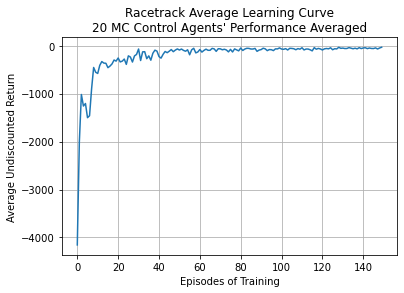

In [6]:
from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking MC Control Results for Obvious Issues.
simple_issue_checking(mc_rewards)

# Plotting MC Control Learning Curve.
%matplotlib inline
plot_results(mc_rewards = mc_rewards)

## Exercise 2: Sarsa (3 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using the Sarsa algorithm, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 6.4 p.129).

<img src="images/sarsa_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Step size parameter $\alpha = 0.2$.
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 20.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of a tabular **Sarsa** agent should produce a list named `sarsa_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `sarsa_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

In [7]:
class TD_Agent(Agent):
    # New base class for temporal difference agents to include learning rate and discount factor as instance variables
    def __init__(self, alpha, gamma):
        self.alpha = alpha
        self.gamma = gamma
        super().__init__()
        

class Sarsa_Agent(TD_Agent):
    # Sarsa agent class inherits from TD_Agent base class
    def update_Q(self, state, action, new_state, reward, env):
        # Define sarsa update rule
        Q = self.Q[state][action]
        
        # Get new state-action pair from policy
        new_action = self.make_action(new_state, env)
        Q_new = Q + self.alpha*(reward + (self.gamma*self.Q[new_state][new_action]) - Q)
        self.Q[state][action] = Q_new
        return new_state, new_action

def sarsa_control(no_agents, no_episodes, alpha, gamma):
    sarsa_rewards = []
    env = RacetrackEnv()
    
    for agents in range(no_agents):
        # Initialise new agent each episode
        agent_rewards = []
        agent = Sarsa_Agent(alpha, gamma)
        
        for episodes in range(no_episodes):
            rewards = 0
            
            # Start episode by resetting environment and initialise starting state, get action from policy
            agent.current_state = env.reset()
            action = agent.make_action(agent.current_state, env)
            terminal = False
            
            # Enter loop for each step of episode
            while (not terminal):
                # Apply given action to environment, update Q accordingly and set new state and action
                new_state, reward, terminal = env.step(action)
                rewards += reward
                agent.current_state, action = agent.update_Q(agent.current_state, action, new_state, reward, env)
                
            agent_rewards.append(rewards)
        sarsa_rewards.append(agent_rewards)
    return sarsa_rewards

In [8]:
# Please write your code for Exercise 2 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your sarsa agent and plot your average learning curve here.
# Do NOT delete this cell.

# YOUR CODE HERE
start_time = datetime.now()
sarsa_rewards = sarsa_control(20, 150, 0.2, 0.9)
end_time = datetime.now()
print('Sarsa Duration: {}'.format(end_time - start_time))

Sarsa Duration: 0:00:12.448532


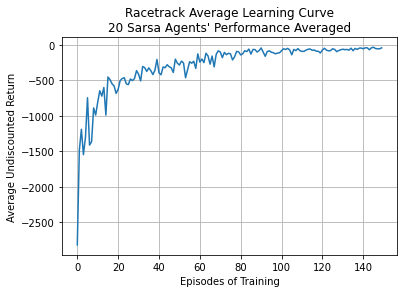

In [9]:
from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking Sarsa Results for Obvious Issues.
simple_issue_checking(sarsa_rewards)

# Plotting Sarsa Learning Curve.
%matplotlib inline
plot_results(sarsa_rewards = sarsa_rewards)

## Exercise 3: Q-Learning (3 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using the Q-Learning algorithm, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5 p.131).

<img src="images/q_learning_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Step size parameter $\alpha = 0.2$.
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 20.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of a tabular **Q-Learning** agent should produce a list named `q_learning_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `q_learning_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

Hint: Your Q-Learning implementation is likely to be similar to your Sarsa implementation. Think hard about where these two algorithms differ.

In [10]:
class QL_Agent(TD_Agent):
    #     Q learning agent inherits from TD_Agent base class
    
    def update_Q(self, state, action, new_state, reward):
        # Define Q update rule
        Q = self.Q[state][action]
        
        # Add unobserved new states to Q dictionary
        if new_state not in self.Q:
            self.add_state(new_state)
            
        # Determine max Q value from available actions for new state
        Q_max = max(self.Q[new_state])
        
        Q_new = Q + self.alpha*(reward + (self.gamma*Q_max) - Q)
        self.Q[state][action] = Q_new
        
def ql_control(no_agents, no_episodes, alpha, gamma):
    ql_rewards = []
    env = RacetrackEnv()
    
    for agents in range(no_agents):
        # Initialise new agent each episode
        agent_rewards = []
        agent = QL_Agent(alpha, gamma)
        total_return = 0
        
        for episodes in range(no_episodes):
            total_return = 0
            
            # Start episode by resetting environment and initialise starting state
            agent.current_state = env.reset()
            terminal = False
            
            # Enter loop for each step of episode
            while (not terminal):
                # get action from policy and apply to environment, update Q accordingly
                action = agent.make_action(agent.current_state, env)
                new_state, reward, terminal = env.step(action)
                total_return += reward
                
                agent.update_Q(agent.current_state, action, new_state, reward)
                
                # set current state to new state
                agent.current_state = new_state
 
            agent_rewards.append(total_return)
        ql_rewards.append(agent_rewards)
    return ql_rewards     

In [11]:
# Please write your code for Exercise 3 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your q-learning agent agent and plot your average learning curve here.
# Do NOT delete this cell.

# YOUR CODE HERE
start_time = datetime.now()
q_learning_rewards = ql_control(20, 150, 0.2, 0.9)
end_time = datetime.now()
print('Q-Learning Duration: {}'.format(end_time - start_time))

Q-Learning Duration: 0:00:13.016423


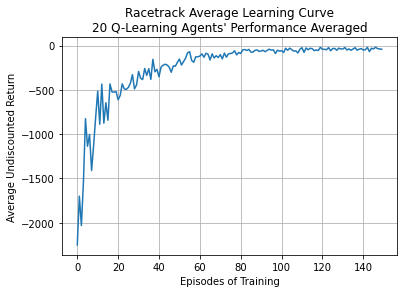

In [12]:
from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking Q-Learning Results for Obvious Issues.
simple_issue_checking(q_learning_rewards)

# Plotting Q-Learning Learning Curve.
%matplotlib inline
plot_results(q_learning_rewards = q_learning_rewards)

## Exercise 4: Comparison & Discussion (10 Marks)

Below, we have used your results to plot your three previous learning curves on the same set of axes. <br />
A cropped version of this learning curve has also been plotted, to make it easier to compare the performance of your agents towards the end of training.

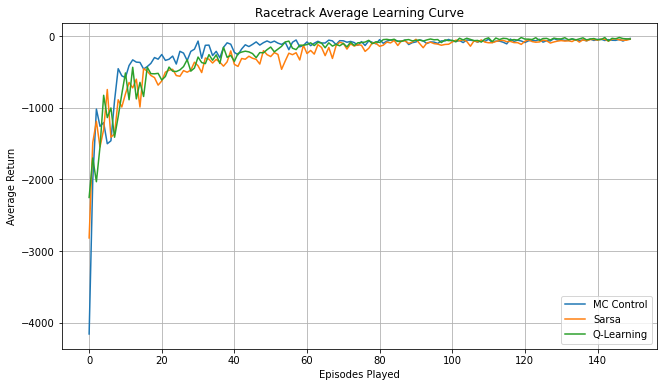

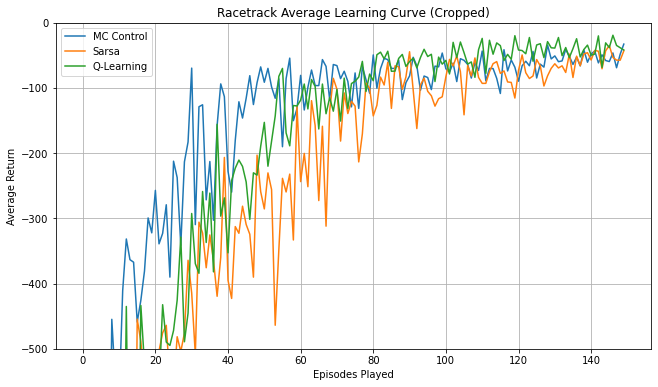

In [13]:
from racetrack_env import plot_combined_results

# Plotting Combined Learning Curve.
%matplotlib inline
plot_combined_results(mc_rewards, sarsa_rewards, q_learning_rewards)

Based on your results, and your understanding of the algorithms that you have implemented, please answer the following discussion questions. <br />
Please do not exceed **two sentences** for any of your answers.

**Question 1:** Briefly compare the performance of each of your agents.

**Question 2:** Why do you think that your Monte Carlo and Temporal-Difference agents behaved differently?

**Question 3:** Does the performance of your Sarsa and Q-Learning agents meet your expectations? Why do you think that this was the case?

**Question 4:** What could be done to improve the performance of your agents?

Please write your answers for Exercise 4 in this markdown cell.

**Answer 1:**
Monte carlo has the quickest learning rate per episode going from the most negative average return to the least in a very short number of episodes; however, it does have a slightly longer runtime, and the mc_agent recieves much larger penalties early on. We see both temporal difference agents have similar learning rates as each other per episode, however the QL agent converges to a higher average return while the monte-carlo and sarsa agents both converge to around the same as each other.

**Answer 2:**
The td_agents update Q values every time-step while the mc_agents have to wait untill a full episode is completed before updating. We see that the learning rate for mc agents is much quicker, this is because far more exploration is done by the mc agent in the first episode due to a lack of state-action value data (causing longer runtime), where we see very large penalties, much larger than the td agents; resultingly, there is far more data to update each q value with early on, so we see a much faster learning rate per episode.

**Answer 3:**
Both start off almost identically and learn at the same rate however the Q learning agent converges to a slightly higher total undiscounted return; this is because q value updates per timestep is done deterministically for the QL agent, choosing next actions in the update function in line with the optimal policy (as its an off policy method choosing the maximum q valued next action) and learning the optimal state-action value function, while sarsa updates q values in line with its exploratory policy (on policy method) learning the optimal state-action value taking random exploration into account. The fact that QL converges to a slightly higher total reward suggests to me that, in the case of this environment, the rewards of taking the optimal state-action value route outweighs the risk of penalties due to random exploration actions.

**Answer 4:**
Parameter tuning to give the most efficient learning rates and discount factors for the algorithms and could change the mc agent update to update states for every visit rather than first visit which would provide more update data to the agent per episode. Could also implement n step updates to allow bootstrapping to be done over multiple timesteps simulataneously although this would count as a modified agent.

## Exercise 5: Modified Q-Learning Agent (18 Marks)
### Exercise 5a: Implementation
In this exercise, you must implement a Temporal-Difference learning agent which learns to reach a goal state in the racetrack more efficiently than your previous Q-Learning agent. You may base your implementation on Q-Learning (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5 p.131), the pseudocode for which is reproduced below, but you may also base your implementation on Sarsa if you wish.

<img src="images/q_learning_algo.png" style="width: 650px;"/>

In order to score high marks in this exercise, you will need to extend your solution beyond a simple Q-Learning or Sarsa agent to achieve higher performance and/or more efficient learning (i.e. using fewer interactions with the environment). Ideas for improving your agent will have been discussed in the unit, and can be found in the course textbook (Reinforcement Learning, Sutton & Barto, 2018). However you go about improving your agent, it must still use a **tabular** Temporal-Difference learning method at its core.

Please use the following parameter settings:
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 2.

**If you use incorrect parameters, you may not get any credit for your work.**

You may adjust all other parameters as you see fit.


Your implementation of a tabular modified Temporal-Difference learning agent should produce a list named `modified_agent_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `modified_agent_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.


In [14]:
class DynaQ_Agent(QL_Agent):
    def __init__(self, alpha, gamma):
        super().__init__(alpha, gamma)
        # Add a dictionary variable for the model.
        self.model_dict = {}
        
    
    def add_model_state(self, state, action, new_state, reward):
        # Add a newly observed transition to the model with a frequency of 1
        self.model_dict[(state, action)] = [[(new_state, reward), 1]]
    
    def update_model(self, state, action, new_state, reward):
        
        # check if state-action pair is in model dict and add if it isn't
        if (state, action) not in self.model_dict:
            self.add_model_state(state, action, new_state, reward)
            return
        
        # if new_state-reward pair has been seen before, add 1 to its frequency.
        for output in self.model_dict[(state, action)]:
            if output[0] == (new_state, reward):
                output[1] += 1
                return
        
        # otherwise append new_state-reward pair to list of observed outcomes for the state-action pair.
        self.model_dict[(state, action)].append([(new_state, reward), 1])
        
    def sample_model(self):
        # Randomly select a state-action pair from the model dictionary and extract its observed outcomes and frequencies.
        to_sample = random.choice(list(self.model_dict.items()))
        state, action, outputs = to_sample[0][0], to_sample[0][1], to_sample[1]
        possible_outcomes = []
        prob_weightings = []
        total_freq = 0
        
        # Add all possible output state-reward pairs to possible outcomes list and
        # assign its respective frequency to the weightings list.
        for output in outputs:
            possible_outcomes.append(output[0])
            total_freq += output[1] # keeping track of the total frequency
            prob_weightings.append(output[1])
        
        # Turn frequencies to probabilities.   
        for prob in prob_weightings:
            prob /= total_freq
        
        # Randomly choose an output according to their respective probabilities
        new_state, reward =  random.choices(possible_outcomes, prob_weightings)[0]
        
        # return sample S, A, S', R
        return state, action, new_state, reward
        
    def query_model(self, state, action):
        # This method is not actually used but should naturally be in the class
        outputs = self.model_dict[(state, action)]
        possible_outcomes = []
        prob_weightings = []
        total_freq = 0
        # Add all possible output state-reward pairs to possible outcomes list and
        # assign its respective frequency to the weightings list.
        for output in outputs:
            possible_outcomes.append(output[0])
            total_freq += output[1] # keeping track of the total frequency
            prob_weightings.append(output[1])
            
        # Turn frequencies to probabilities.   
        for prob in prob_weightings:
            prob /= total_freq
        
        # Randomly choose an output according to their respective probabilities
        new_state, reward =  random.choices(possible_outcomes, prob_weightings)[0]
        
        # return sample S', R
        return new_state, reward   

def dynaQ(no_agents, no_episodes, alpha, gamma, planning_steps):
    dq_rewards = []
    env = RacetrackEnv()
    
    for agents in range(no_agents):
        # Initialise new agent each episode
        agent_rewards = []
        agent = DynaQ_Agent(alpha, gamma)
        total_return = 0
        
        for episodes in range(no_episodes):
            total_return = 0
            
            # Start episode by resetting environment and initialise starting state
            agent.current_state = env.reset()
            terminal = False
            
            # Enter loop for each step of episode
            while (not terminal):
                # get action from policy and apply to environment, update Q accordingly
                action = agent.make_action(agent.current_state, env)
                new_state, reward, terminal = env.step(action)
                total_return += reward
                agent.update_Q(agent.current_state, action, new_state, reward)
                
                # Add transition to model and enter planning loop
                agent.update_model(agent.current_state, action, new_state, reward)
                for learning_loop in range(planning_steps):
                    # query model for model(S, A) = S', R
                    mod_state, mod_action, new_mod_state, mod_reward = agent.sample_model()
                    # Update Q accordingly
                    agent.update_Q(mod_state, mod_action, new_mod_state, mod_reward)
                    
                    
                # Continue with learning.
                # set current state to new state and add reward to total
                agent.current_state = new_state
 
            agent_rewards.append(total_return)
        dq_rewards.append(agent_rewards)
    return dq_rewards   

In [15]:
# Please write your code for Exercise 5a in this cell or in as many cells as you want ABOVE this cell.
# You should implement your modified q-learning agent agent and plot your average learning curve here.
# Do NOT delete this cell.

# YOUR CODE HERE
start_time = datetime.now()
modified_agent_rewards = dynaQ(20,150,0.2,0.9,10)
end_time = datetime.now()  
print('DynaQ Duration: {}'.format(end_time - start_time))

DynaQ Duration: 0:00:53.677055


### Exercise 5b: Comparison & Discussion

Below, we have used your results to plot a the performance of your modified agent and your previous Q-Learning agent on the same set of axes. <br />
A cropped version of this learning curve has also been plotted, to make it easier to compare the performance of your agents towards the end of training.

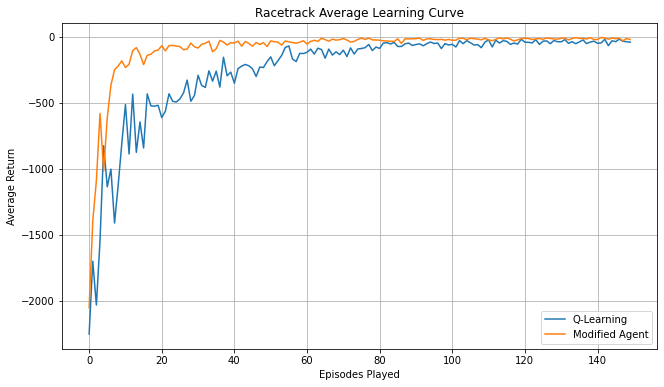

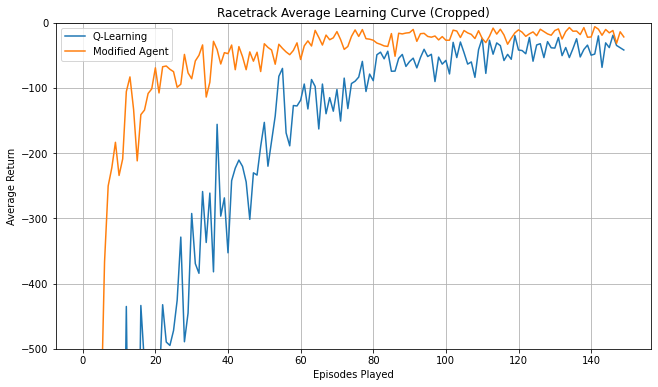

In [16]:
from racetrack_env import plot_modified_agent_results
from racetrack_env import simple_issue_checking

# Checking Modified Agent Results for Obvious Issues.
simple_issue_checking(modified_agent_rewards, modified_agent = True)

# Plotting Modified Agent Learning Curve.
%matplotlib inline
plot_modified_agent_results(q_learning_rewards, modified_agent_rewards)

Based on your results, and your understanding of the algorithm and modifications that you have implemented, please answer the following discussion questions. <br />
Please do not exceed **two sentences** for any of your answers.

**Question 1:** What modifications did you make to your agent?

**Question 2:** What effect(s) did you expect your modifications to have on the performance of your agent?

**Question 3:** Did your modifications have the effect(s) you expected? Why do you think that this was the case?

**Question 4:** If you had more time, what would you do to further improve the performance of your agent?

Please note that **your implementation and discussion will be assessed jointly**. This means that, in order to score highly, you will need to correctly implement appropriate modifications to your agent **AND** discuss them well.

Please write your answers for Exercise 5b in this markdown cell.

**Answer 1:**
The new agent has a stochastic model for the environment which records observed state-action transitions and their respective occurance frequencies, the model can then be queried or sampled to give a random state-action pair and computes an output based on the calculated probabilities of observed outcomes occuring (this is done by taking each new_state-reward output pair frequency and dividing it by the total state-action frequency). A dyna Q learning algorithm was then implemented which adds a planning loop (the number of loops can be set as argument) at each timestep which randomly samples state action pairs and computes an output based on the model; this is then used to update the agent's Q values.  

**Answer 2:**
I expected the learning rate per episode to increase, as well as the maximum total discounted return across training. I also expected the runtime to increase due to extra computation per timestep. The modified agent now performs with a much faster learning rate per episode and reaches a higher average return than any of the other models.

**Answer 3:**
Yes, all three expected effects on performance were observed; as the agent progresses through training its model improves very quickly as more and more states are observed, sampling the model and updating the agents q values accordingly allows updates from environment interactions to propagate through the state space more efficiently per timestep, as states don't need to be actually visited by the agent in the environment to be updated. This means more state-action Q values are updated per timestep hence the better learning rate per episode and higher reached average return. As stated above the extra computation of the learning loop increased the runtime from around 10 seconds for q learning to around a minute for dyna q. 

**Answer 4:**
I would firstly vary the learning rates and discount factors to find the optimal performance values for these parameters. I would also look to implement a prioritized sweeping algorithm where the planning phase works backwards from a state-action which has been updated that timestep through state-actions which could have directly lead to the updated state-action, updating them and then updating their predecessors and so forth; this would improve upon the efficiency of the propagation of value changes during planning, and reduce useless computation on pointless updates as my current dynaQ algorithm's planning phase is completely random in which states it updates during planning.